In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(data = iris.data,columns = iris.feature_names)
df['species'] = iris.target_names[iris.target]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
X = df.drop(['species'],axis = 1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [6]:
model = GaussianNB().fit(X_train,y_train)

In [7]:
y_pred = model.predict(X_test)
y_pred

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'setosa', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa'],
      dtype='<U10')

In [9]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9666666666666667

# Social Network ads example


In [45]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [46]:
df.Purchased.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [47]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

count    400.000000
mean      37.655000
std       10.482877
min       18.000000
25%       29.750000
50%       37.000000
75%       46.000000
max       60.000000
Name: Age, dtype: float64


<Axes: ylabel='Age'>

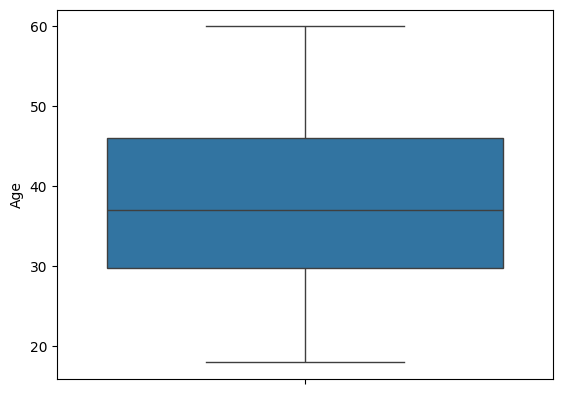

In [48]:
print(df['Age'].describe())
sns.boxplot(data = df['Age'])

In [49]:
df.loc[df['Gender'] == 'Male','Gender'] = 0
df.loc[df['Gender'] == 'Female','Gender'] = 1
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


In [50]:
df.drop(['User ID'],axis = 1, inplace=True)
df

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


In [51]:
def min_max_normalize(feature):
    df[feature] = (df[feature] - df[feature].min() ) / (df[feature].max() - df[feature].min()) 

min_max_normalize('EstimatedSalary')
min_max_normalize('Age')
df

,Gender,Age,EstimatedSalary,Purchased
0,0,0.023810,0.029630,0
1,0,0.404762,0.037037,0
2,1,0.190476,0.207407,0
3,1,0.214286,0.311111,0
4,0,0.023810,0.451852,0
...,...,...,...,...
395,1,0.666667,0.192593,1
396,0,0.785714,0.059259,1
397,1,0.761905,0.037037,1
398,0,0.428571,0.133333,0


In [52]:
X = np.asarray(df.drop(['Purchased'],axis = 1))
y = np.asarray(df['Purchased'])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


In [53]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [54]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [37]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8

In [55]:
matrix = confusion_matrix(y_test,y_pred)
matrix

array([[46,  3],
       [12, 19]])

In [56]:
tp = ((y_pred == 1) & (y_test == 1)).sum()
fp = ((y_pred == 1) & (y_test == 0)).sum()
fn = ((y_pred == 0) & (y_test == 1)).sum()
tn = ((y_pred == 0) & (y_test == 0)).sum()
tp,fp,fn,tn

(np.int64(19), np.int64(3), np.int64(12), np.int64(46))

In [57]:
recall = tp / (tp + fn)
accuracy = (tp + tn) / (tp + fp + tn + fn)
precision = tp / (tp + fp)
error = 1 - accuracy
f1 = (2 * recall * precision) / (recall + precision)


In [58]:
print("Recall:",recall)
print("accuracy:",accuracy)
print("Precision:",precision)
print("Error:",error)
print("F1-score:",f1)

Recall: 0.6129032258064516
accuracy: 0.8125
Precision: 0.8636363636363636
Error: 0.1875
F1-score: 0.7169811320754716
